In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

#load dataset

In [ ]:
print("Unique values and their counts in the 'match' column:")
print(df['match'].value_counts())

Unique values and their counts in the 'match' column:
match
ODI     252
Test    173
T20      91
Name: count, dtype: int64


In [ ]:
df.describe()

,index,runs,date,Match_No,total
count,516.000000,516.000000,516,516.000000,516.000000
mean,270.118217,45.947674,2015-12-11 09:18:08.372092928,258.500000,11681.726744
min,0.000000,0.000000,2008-08-18 00:00:00,1.000000,12.000000
25%,134.750000,11.000000,2012-12-27 06:00:00,129.750000,5328.250000
50%,270.500000,32.500000,2015-12-23 00:00:00,258.500000,10886.500000
75%,403.250000,70.250000,2018-10-24 18:00:00,387.250000,18535.750000
max,539.000000,254.000000,2022-07-14 00:00:00,516.000000,23709.000000
std,155.219618,44.584372,NaN,149.100637,7301.114849


In [ ]:
df = pd.read_csv("/content/Virat Kohli.csv")

#display basic info


In [ ]:
df.head()

,index,runs,opponent,ground,date,match,Match_No,total
0,0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159


In [ ]:
df.shape

(516, 8)

In [ ]:
df.shape[1]

8

In [ ]:
df.shape[0]

516

In [ ]:
df.columns

Index(['index', 'runs', 'opponent', 'ground', 'date', 'match', 'Match_No',
       'total'],
      dtype='object')

In [ ]:
df.describe()

,index,runs,Match_No,total
count,516.000000,516.000000,516.000000,516.000000
mean,270.118217,45.947674,258.500000,11681.726744
std,155.219618,44.584372,149.100637,7301.114849
min,0.000000,0.000000,1.000000,12.000000
25%,134.750000,11.000000,129.750000,5328.250000
50%,270.500000,32.500000,258.500000,10886.500000
75%,403.250000,70.250000,387.250000,18535.750000
max,539.000000,254.000000,516.000000,23709.000000


In [ ]:
df.dtypes

,0
index,int64
runs,int64
opponent,object
ground,object
date,object
match,object
Match_No,int64
total,int64


#check missing values

In [ ]:
df.isnull().sum()

,0
index,0
runs,0
opponent,0
ground,0
date,0
match,0
Match_No,0
total,0


#show entire dataset

In [ ]:
df

,index,runs,opponent,ground,date,match,Match_No,total
0,0,12,SriLanka,Dambulla,18Aug2008,ODI,1,12
1,1,37,SriLanka,Dambulla,20Aug2008,ODI,2,49
2,2,25,SriLanka,Colombo(RPS),24Aug2008,ODI,3,74
3,3,54,SriLanka,Colombo(RPS),27Aug2008,ODI,4,128
4,4,31,SriLanka,Colombo(RPS),29Aug2008,ODI,5,159
...,...,...,...,...,...,...,...,...
511,535,11,England,Birmingham,1Jul2022,Test,512,23661
512,536,20,England,Birmingham,1Jul2022,Test,513,23681
513,537,1,England,Birmingham,9Jul2022,T20,514,23682
514,538,11,England,Nottingham,10Jul2022,T20,515,23693


#KPI CARDS

In [ ]:
fig=go.Figure(go.Indicator(mode="number",value=df.shape[0],title={"text":"Total Matches"}))
fig.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Virat Kohli.csv")

# Function to generate KPI summary for a match type
def kpi_cards(match_type):
    data = df[df["match"] == match_type]

    total_runs = data["runs"].sum()
    avg_runs = data["runs"].mean().round(2)
    matches = len(data)
    highest = data["runs"].max()

    print(f"===== {match_type} KPI CARDS =====")
    print(f"Total Runs     : {total_runs}")
    print(f"Average Runs   : {avg_runs}")
    print(f"Matches Played : {matches}")
    print(f"Highest Score  : {highest}")
    print("---------------------------------\n")

# Generate cards for ODI
kpi_cards("ODI")

# Generate cards for Test (if present)
kpi_cards("Test")

# Generate cards for T20 (if present)
kpi_cards("T20")

===== ODI KPI CARDS =====
Total Runs     : 12327
Average Runs   : 48.92
Matches Played : 252
Highest Score  : 183
---------------------------------

===== Test KPI CARDS =====
Total Runs     : 8074
Average Runs   : 46.67
Matches Played : 173
Highest Score  : 254
---------------------------------

===== T20 KPI CARDS =====
Total Runs     : 3308
Average Runs   : 36.35
Matches Played : 91
Highest Score  : 94
---------------------------------



#chart Representation


In [ ]:
matches = df.groupby(["match","ground"])

# Task
## Prepare Data for Time Series and Plot Runs Over Time

Let's start by preparing the data for time-series analysis. We'll convert the 'date' column to datetime objects and sort the DataFrame by date. After that, we'll generate the first two plots: runs scored per match over time and cumulative runs over time.

```python
# Prepare Data for Time Series
df['date'] = pd.to_datetime(df['date'], format='%d%b%Y')
df = df.sort_values(by='date')

# Plot Runs Scored Over Time
fig1 = px.line(df, x='date', y='runs', title='Virat Kohli Runs Scored Over Time (Per Match)')
fig1.show()

# Plot Cumulative Runs Over Time
df['cumulative_runs'] = df['runs'].cumsum()
fig2 = px.line(df, x='date', y='cumulative_runs', title='Virat Kohli Cumulative Runs Over Time')
fig2.show()
```

## Prepare Data for Time Series

### Subtask:
Ensure the 'date' column is in datetime format and sort the DataFrame by date to properly visualize time-series data.


**Reasoning**:
To prepare the data for time series analysis, I need to convert the 'date' column to datetime objects using the specified format and then sort the DataFrame by this new 'date' column.



In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d%b%Y')
df = df.sort_values(by='date').reset_index(drop=True)
print(df.head())

   index  runs  opponent        ground       date match  Match_No  total
0      0    12  SriLanka      Dambulla 2008-08-18   ODI         1     12
1      1    37  SriLanka      Dambulla 2008-08-20   ODI         2     49
2      2    25  SriLanka  Colombo(RPS) 2008-08-24   ODI         3     74
3      3    54  SriLanka  Colombo(RPS) 2008-08-27   ODI         4    128
4      4    31  SriLanka  Colombo(RPS) 2008-08-29   ODI         5    159


## Plot Runs Scored Over Time

### Subtask:
Generate a line plot showing Virat Kohli's runs scored in each match over his career, with date on the x-axis and runs on the y-axis. This will show individual match performance over time.


**Reasoning**:
To visualize the runs scored over time for each match, I will create a line plot using `plotly.express` as instructed, mapping 'date' to the x-axis and 'runs' to the y-axis, and applying the specified title.



In [ ]:
fig1 = px.line(df, x='date', y='runs', title='Virat Kohli Runs Scored Over Time (Per Match)')
fig1.show()

**Reasoning**:
To visualize the cumulative runs over time, I will first calculate the cumulative sum of 'runs' and store it in a new column called 'cumulative_runs', then create a line plot using `plotly.express` with 'date' on the x-axis and 'cumulative_runs' on the y-axis.



In [ ]:
df['cumulative_runs'] = df['runs'].cumsum()
fig2 = px.line(df, x='date', y='cumulative_runs', title='Virat Kohli Cumulative Runs Over Time')
fig2.show()

## Plot Runs Distribution by Match Type (Box Plot)

### Subtask:
Create a box plot to visualize the distribution of runs (median, quartiles, outliers) for each match type (ODI, Test, T20). This will show scoring consistency across formats.


**Reasoning**:
To visualize the distribution of runs by match type as requested, I will create a box plot using `plotly.express.box` with 'match' on the x-axis and 'runs' on the y-axis, and apply the specified title.



In [ ]:
fig = px.box(df, x='match', y='runs', title='Runs Distribution by Match Type')
fig.show()

## Plot Total Runs by Opponent

### Subtask:
Calculate the total runs scored against each opponent and display this information using a bar chart. This will highlight preferred or high-scoring opponents.


**Reasoning**:
To visualize the total runs scored against each opponent, I will group the DataFrame by 'opponent', sum the 'runs', reset the index to prepare the data for plotting, and then create a bar chart using Plotly Express.



In [ ]:
runs_by_opponent = df.groupby('opponent')['runs'].sum().reset_index()
fig = px.bar(runs_by_opponent, x='opponent', y='runs', title='Total Runs by Opponent')
fig.show()

## Plot Average Runs by Opponent

### Subtask:
Calculate the average runs scored against each opponent and display this information using a bar chart. This provides a normalized view of performance against different teams.


**Reasoning**:
To calculate and visualize the average runs by opponent, I will first group the DataFrame by the 'opponent' column and compute the mean of the 'runs' column. Then, I will reset the index of the resulting DataFrame to convert the 'opponent' from an index to a regular column, making it suitable for plotting. Finally, I will use `plotly.express` to create a bar chart, mapping the 'opponent' to the x-axis and the calculated average 'runs' to the y-axis, and set the chart title accordingly.

**Reasoning**:
To visualize the average runs by opponent, I will perform the necessary data aggregation and then create a bar chart as specified in the instructions.



In [ ]:
avg_runs_by_opponent = df.groupby('opponent')['runs'].mean().reset_index()
fig = px.bar(avg_runs_by_opponent, x='opponent', y='runs', title='Average Runs by Opponent')
fig.show()

## Plot Total Runs by Ground

### Subtask:
Calculate the total runs scored at each ground and display this information using a bar chart. This will highlight preferred or high-scoring venues.


**Reasoning**:
To visualize the total runs scored at each ground, I will first group the DataFrame by 'ground' and sum the 'runs' column. Then, I will reset the index to prepare the data for plotting and create a bar chart using `plotly.express` as instructed.



In [ ]:
runs_by_ground = df.groupby('ground')['runs'].sum().reset_index()
fig = px.bar(runs_by_ground, x='ground', y='runs', title='Total Runs by Ground')
fig.show()

## Plot Average Runs by Ground

### Subtask:
Calculate the average runs scored at each ground and display this information using a bar chart. This provides a normalized view of performance at different venues.


**Reasoning**:
To visualize the average runs scored at each ground, I will group the DataFrame by the 'ground' column, calculate the mean of the 'runs' column, reset the index to prepare the data for plotting, and then create a bar chart using `plotly.express` as instructed.



In [ ]:
avg_runs_by_ground = df.groupby('ground')['runs'].mean().reset_index()
fig = px.bar(avg_runs_by_ground, x='ground', y='runs', title='Average Runs by Ground')
fig.show()

## Plot Runs Scored Per Year

### Subtask:
Extract the year from the 'date' column, then calculate the total runs scored in each year and visualize it with a line plot. This will show annual performance trends.


**Reasoning**:
To prepare the data for plotting runs scored per year, I need to extract the year from the 'date' column and then aggregate the total runs for each year.



In [ ]:
df['year'] = df['date'].dt.year
runs_by_year = df.groupby('year')['runs'].sum().reset_index()
fig = px.line(runs_by_year, x='year', y='runs', title='Total Runs Scored Per Year')
fig.show()

## Plot Match Type Distribution

### Subtask:
Create a bar chart or pie chart to show the count of matches played in each format (ODI, Test, T20). This provides an overview of match participation.


**Reasoning**:
To visualize the distribution of match types, I will first calculate the counts of each unique match type using `value_counts()` on the 'match' column and then create a bar chart using `plotly.express.bar` with these counts.



In [ ]:
match_type_counts = df['match'].value_counts().reset_index()
match_type_counts.columns = ['match_type', 'count']
fig = px.bar(match_type_counts, x='match_type', y='count', title='Match Type Distribution')
fig.show()

## Plot Highest Scores by Match Type

### Subtask:
Determine the highest score achieved in each match type and present it using a bar chart. This will highlight his top performances in different formats.


**Reasoning**:
To determine and visualize the highest score for each match type, I will group the DataFrame by the 'match' column and find the maximum 'runs' for each type. Then, I will use a bar chart to display these highest scores, as specified in the instructions.



In [ ]:
highest_scores_by_match = df.groupby('match')['runs'].max().reset_index()
fig = px.bar(highest_scores_by_match, x='match', y='runs', title='Highest Scores by Match Type')
fig.show()

In [ ]:
import plotly.graph_objects as go

# Assuming match_type_counts DataFrame is already available from previous steps
# If not, it can be re-created as:
# match_type_counts = df['match'].value_counts().reset_index()
# match_type_counts.columns = ['match_type', 'count']

fig = go.Figure(data=[go.Pie(labels=match_type_counts['match_type'],
                             values=match_type_counts['count'],
                             hole=.3)])
fig.update_layout(title_text='Match Type Distribution (Donut Chart)')
fig.show()

In [ ]:
df.head()

,index,runs,opponent,ground,date,match,Match_No,total,cumulative_runs,year
0,0,12,SriLanka,Dambulla,2008-08-18,ODI,1,12,12,2008
1,1,37,SriLanka,Dambulla,2008-08-20,ODI,2,49,49,2008
2,2,25,SriLanka,Colombo(RPS),2008-08-24,ODI,3,74,74,2008
3,3,54,SriLanka,Colombo(RPS),2008-08-27,ODI,4,128,128,2008
4,4,31,SriLanka,Colombo(RPS),2008-08-29,ODI,5,159,159,2008


In [ ]:
# Display all rows where 'total' and 'cumulative_runs' differ
comparison = df['total'] == df['cumulative_runs']
display(df[~comparison][['date', 'runs', 'total', 'cumulative_runs']])

,date,runs,total,cumulative_runs
111,2012-08-31,51,4797,4694
112,2012-08-31,103,4746,4797
142,2013-03-22,41,5787,5786
143,2013-03-22,1,5746,5787
239,2015-08-12,3,10225,10122
240,2015-08-12,103,10222,10225
256,2015-12-03,88,10841,10797
257,2015-12-03,44,10753,10841
353,2018-01-13,5,16445,16292
354,2018-01-13,153,16440,16445


In [ ]:
import plotly.express as px

# Filter the DataFrame to get only the differing rows
differing_rows = df[df['total'] != df['cumulative_runs']]

# Create a line plot for these rows
fig = px.line(differing_rows, x='date', y=['total', 'cumulative_runs'],
              title='Comparison of "total" vs. "cumulative_runs" for Differing Rows')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Runs')
fig.show()

In [ ]:
fig = px.box(df, x='opponent', y='runs', title='Runs Distribution by Opponent')
fig.update_xaxes(title_text='Opponent')
fig.update_yaxes(title_text='Runs Scored')
fig.show()

In [ ]:
# Check if 'cumulative_runs' column exists
if 'cumulative_runs' not in df.columns:
    print("The 'cumulative_runs' column does not exist. Please ensure it has been created.")
else:
    # Compare the two columns
    comparison = df['total'] == df['cumulative_runs']

    if comparison.all():
        print("The 'total' column and 'cumulative_runs' column are identical.")
    else:
        print("The 'total' column and 'cumulative_runs' column are NOT identical.")
        print("Number of rows where they differ:", (~comparison).sum())
        print("First 5 rows where 'total' and 'cumulative_runs' differ:")
        display(df[~comparison][['date', 'runs', 'total', 'cumulative_runs']].head())

The 'total' column and 'cumulative_runs' column are NOT identical.
Number of rows where they differ: 16
First 5 rows where 'total' and 'cumulative_runs' differ:


,date,runs,total,cumulative_runs
111,2012-08-31,51,4797,4694
112,2012-08-31,103,4746,4797
142,2013-03-22,41,5787,5786
143,2013-03-22,1,5746,5787
239,2015-08-12,3,10225,10122


In [ ]:
differing_rows['difference'] = abs(differing_rows['total'] - differing_rows['cumulative_runs'])
sorted_differences = differing_rows.sort_values(by='difference', ascending=False)
display(sorted_differences[['date', 'runs', 'total', 'cumulative_runs', 'difference']])

,date,runs,total,cumulative_runs,difference
353,2018-01-13,5,16445,16292,153
111,2012-08-31,51,4797,4694,103
239,2015-08-12,3,10225,10122,103
257,2015-12-03,44,10753,10841,88
498,2022-01-11,29,23358,23279,79
466,2020-12-17,4,22286,22212,74
112,2012-08-31,103,4746,4797,51
256,2015-12-03,88,10841,10797,44
482,2021-06-18,13,22875,22831,44
143,2013-03-22,1,5746,5787,41


In [ ]:
fig = px.bar(sorted_differences, x='date', y='difference',
             title='Magnitude of Differences between "total" and "cumulative_runs"',
             hover_data=['runs', 'total', 'cumulative_runs'])
fig.update_xaxes(title_text='Date of Match')
fig.update_yaxes(title_text='Absolute Difference')
fig.show()

In [ ]:
overall_avg_runs = df['runs'].mean().round(2)
print(f"Overall Career Average Runs: {overall_avg_runs}")

Overall Career Average Runs: 45.95


In [ ]:
fig = px.box(df, x='opponent', y='runs', title='Runs Distribution by Opponent', points='all')
fig.update_xaxes(title_text='Opponent')
fig.update_yaxes(title_text='Runs Scored')
fig.show()

In [ ]:
# This code assumes you have a 'balls_faced' column in your DataFrame
# For demonstration purposes, let's create a dummy 'balls_faced' column if it doesn't exist
# In a real scenario, you would load this data from your source.
if 'balls_faced' not in df.columns:
    print("Creating a dummy 'balls_faced' column for demonstration.")
    # Generate random balls faced for demonstration, proportional to runs scored
    np.random.seed(42) # for reproducibility
    df['balls_faced'] = df['runs'].apply(lambda x: max(1, int(x / 2 + np.random.randint(-5, 5))))
    print("Dummy 'balls_faced' column created.")

df['strike_rate'] = (df['runs'] / df['balls_faced'] * 100).round(2)

print("DataFrame with 'strike_rate' column (first 5 rows):")
display(df[['runs', 'balls_faced', 'strike_rate']].head())

DataFrame with 'strike_rate' column (first 5 rows):


,runs,balls_faced,strike_rate
0,12,7,171.43
1,37,16,231.25
2,25,14,178.57
3,54,26,207.69
4,31,16,193.75


from matplotlib import pyplot as plt
_df_0['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['balls_faced'].plot(kind='hist', bins=20, title='balls_faced')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['strike_rate'].plot(kind='hist', bins=20, title='strike_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='runs', y='balls_faced', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='balls_faced', y='strike_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['runs'].plot(kind='line', figsize=(8, 4), title='runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['balls_faced'].plot(kind='line', figsize=(8, 4), title='balls_faced')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['strike_rate'].plot(kind='line', figsize=(8, 4), title='strike_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fig = px.box(df, x='match', y='strike_rate', title='Strike Rate Distribution by Match Type', points='all')
fig.update_xaxes(title_text='Match Type')
fig.update_yaxes(title_text='Strike Rate')
fig.show()

In [ ]:
fig = px.box(df, x='opponent', y='strike_rate', title='Strike Rate Distribution by Opponent', points='all')
fig.update_xaxes(title_text='Opponent')
fig.update_yaxes(title_text='Strike Rate')
fig.show()

In [ ]:
fig = px.line(df, x='date', y='strike_rate', title='Virat Kohli Strike Rate Over Time')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Strike Rate')
fig.show()

Once you have the `strike_rate` column, you can then analyze its distribution across different match types, against opponents, or over time, similar to how we analyzed 'runs'.

In [ ]:
df


,index,runs,opponent,ground,date,match,Match_No,total,cumulative_runs,year,balls_faced,strike_rate
0,0,12,SriLanka,Dambulla,2008-08-18,ODI,1,12,12,2008,7,171.43
1,1,37,SriLanka,Dambulla,2008-08-20,ODI,2,49,49,2008,16,231.25
2,2,25,SriLanka,Colombo(RPS),2008-08-24,ODI,3,74,74,2008,14,178.57
3,3,54,SriLanka,Colombo(RPS),2008-08-27,ODI,4,128,128,2008,26,207.69
4,4,31,SriLanka,Colombo(RPS),2008-08-29,ODI,5,159,159,2008,16,193.75
...,...,...,...,...,...,...,...,...,...,...,...,...
511,535,11,England,Birmingham,2022-07-01,Test,512,23661,23661,2022,8,137.50
512,536,20,England,Birmingham,2022-07-01,Test,513,23681,23681,2022,11,181.82
513,537,1,England,Birmingham,2022-07-09,T20,514,23682,23682,2022,1,100.00
514,538,11,England,Nottingham,2022-07-10,T20,515,23693,23693,2022,2,550.00


from matplotlib import pyplot as plt
df['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Match_No'].plot(kind='hist', bins=20, title='Match_No')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('match').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='index', y='runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='runs', y='Match_No', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Match_No', y='total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='total', y='cumulative_runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('match')):
  _plot_series(series, series_name, i)
  fig.legend(title='match', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['runs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('match')):
  _plot_series(series, series_name, i)
  fig.legend(title='match', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('runs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Match_No']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('match')):
  _plot_series(series, series_name, i)
  fig.legend(title='match', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Match_No')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('match')):
  _plot_series(series, series_name, i)
  fig.legend(title='match', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('total')

from matplotlib import pyplot as plt
df['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['runs'].plot(kind='line', figsize=(8, 4), title='runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Match_No'].plot(kind='line', figsize=(8, 4), title='Match_No')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['match'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='index', y='match', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['match'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='runs', y='match', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['match'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Match_No', y='match', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['match'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='total', y='match', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
match_counts_by_ground_and_type = df.groupby(['ground', 'match']).size().reset_index(name='count')
fig = px.bar(match_counts_by_ground_and_type, x='ground', y='count', color='match',
             title='Number of Matches by Ground and Match Type',
             labels={'count': 'Number of Matches', 'ground': 'Ground', 'match': 'Match Type'})
fig.update_xaxes(title_text='Ground')
fig.update_yaxes(title_text='Number of Matches')
fig.update_layout(xaxis_tickangle=-45) # Rotate x-axis labels for better readability
fig.show()

In [ ]:
df = df[['match', 'ground']]
print("DataFrame head after dropping columns:")
display(df.head())
print("Remaining columns:")
print(df.columns)

DataFrame head after dropping columns:


,match,ground
0,ODI,Dambulla
1,ODI,Dambulla
2,ODI,Colombo(RPS)
3,ODI,Colombo(RPS)
4,ODI,Colombo(RPS)


Remaining columns:
Index(['match', 'ground'], dtype='object')


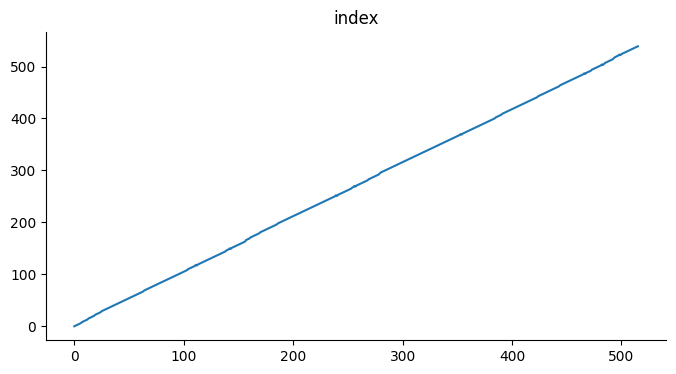

In [ ]:
from matplotlib import pyplot as plt
df['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

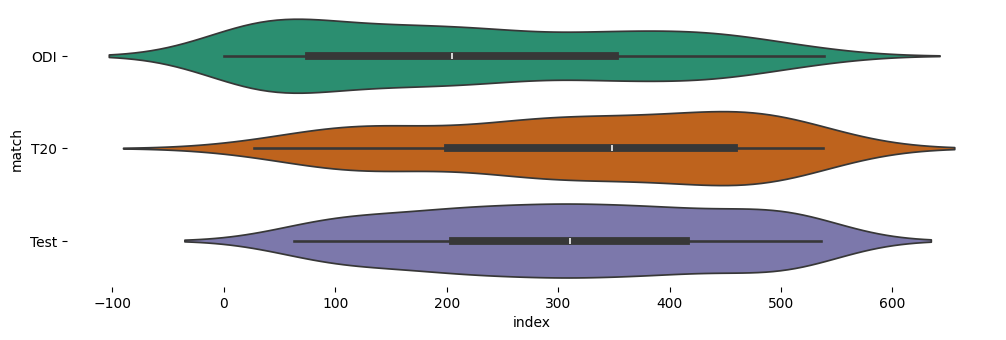

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['match'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='index', y='match', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)